<a href="https://colab.research.google.com/github/Natrj14/green-screen/blob/main/invisible_cloak.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

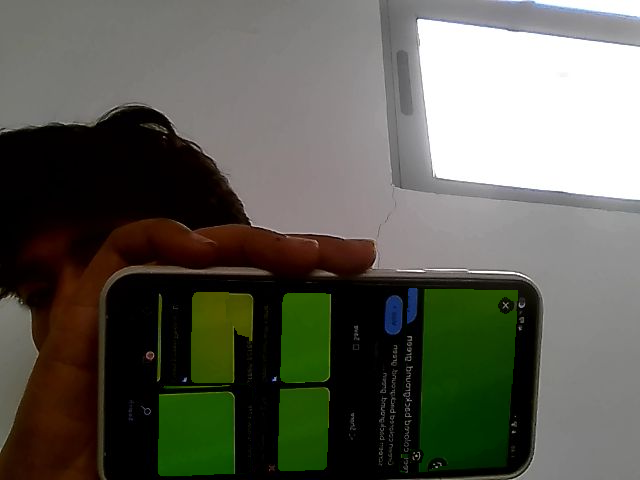

KeyboardInterrupt: Interrupted by user

In [ ]:
# # Install dependencies
# !apt-get install -y cmake
# !pip install dlib
# !pip install imutils

# import cv2
# import numpy as np
# from google.colab.patches import cv2_imshow
# from IPython.display import display, Javascript, clear_output
# from google.colab.output import eval_js
# from base64 import b64decode
# import io
# from PIL import Image


# # JavaScript to capture webcam frame
# def js_video_capture():
#     js = Javascript('''
#     async function captureFrame() {
#       const video = document.createElement('video');
#       video.style.display = 'none';
#       document.body.appendChild(video);

#       const stream = await navigator.mediaDevices.getUserMedia({video: true});
#       video.srcObject = stream;
#       await video.play();

#       await new Promise(resolve => setTimeout(resolve, 500));

#       const canvas = document.createElement('canvas');
#       canvas.width = video.videoWidth;
#       canvas.height = video.videoHeight;
#       const ctx = canvas.getContext('2d');
#       ctx.drawImage(video, 0, 0);

#       stream.getTracks().forEach(track => track.stop());
#       document.body.removeChild(video);

#       return canvas.toDataURL('image/jpeg', 0.8);
#     }
#     ''')
#     display(js)
#     data = eval_js('captureFrame()')
#     return data


# # Convert JS image to OpenCV format
# def get_frame():
#     data = js_video_capture()
#     binary = b64decode(data.split(',')[1])
#     img = Image.open(io.BytesIO(binary))
#     return cv2.cvtColor(np.array(img), cv2.COLOR_RGB2BGR)


# # --- STEP 1: Capture background (without green object) ---
# print("📸 Move out of the frame and press Enter to capture background.")
# input("Press Enter...")
# background = get_frame()
# background = np.flip(background, axis=1)
# print("✅ Background captured!")


# # --- STEP 2: Start cloak effect ---
# while True:
#     user_in = input("Press Enter to capture frame (or type q to quit): ")
#     if user_in.lower() == 'q':
#         break

#     frame = get_frame()
#     frame = np.flip(frame, axis=1)

#     # Convert to HSV
#     hsv = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)

#     # Green color range
#     lower_green = np.array([35, 40, 40])
#     upper_green = np.array([85, 255, 255])
#     mask = cv2.inRange(hsv, lower_green, upper_green)

#     # Clean mask
#     mask = cv2.morphologyEx(mask, cv2.MORPH_OPEN, np.ones((3, 3), np.uint8), iterations=2)
#     mask = cv2.dilate(mask, np.ones((3, 3), np.uint8), iterations=1)
#     mask_inv = cv2.bitwise_not(mask)

#     # Remove green object
#     res1 = cv2.bitwise_and(background, background, mask=mask)
#     res2 = cv2.bitwise_and(frame, frame, mask=mask_inv)
#     final_output = cv2.addWeighted(res1, 1, res2, 1, 0)

#     clear_output(wait=True)
#     cv2_imshow(final_output)


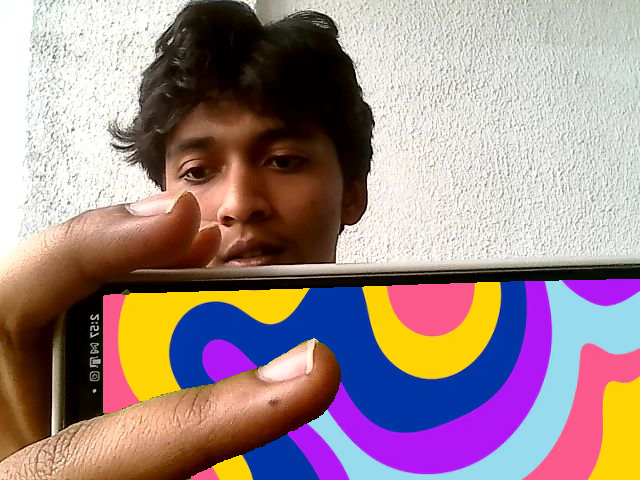

KeyboardInterrupt: Interrupted by user

In [ ]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow
from IPython.display import display, Javascript, clear_output
from google.colab.output import eval_js
from base64 import b64decode
import io
from PIL import Image

# Load your replacement image
replacement = cv2.imread("/content/download.png")

# Resize replacement later to match frame size
def resize_replacement(img, shape):
    return cv2.resize(img, (shape[1], shape[0]))


# JavaScript to capture webcam frame
def js_video_capture():
    js = Javascript('''
    async function captureFrame() {
      const video = document.createElement('video');
      video.style.display = 'none';
      document.body.appendChild(video);

      const stream = await navigator.mediaDevices.getUserMedia({video: true});
      video.srcObject = stream;
      await video.play();

      await new Promise(resolve => setTimeout(resolve, 500));

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      const ctx = canvas.getContext('2d');
      ctx.drawImage(video, 0, 0);

      stream.getTracks().forEach(track => track.stop());
      document.body.removeChild(video);

      return canvas.toDataURL('image/jpeg', 0.8);
    }
    ''')
    display(js)
    data = eval_js('captureFrame()')
    return data


# Convert JS image to OpenCV format
def get_frame():
    data = js_video_capture()
    binary = b64decode(data.split(',')[1])
    img = Image.open(io.BytesIO(binary))
    return cv2.cvtColor(np.array(img), cv2.COLOR_RGB2BGR)


print("✅ Ready! Each time you press Enter, it will capture a frame with green replaced.")

while True:
    user_in = input("Press Enter to capture (or type q to quit): ")
    if user_in.lower() == 'q':
        break

    frame = get_frame()
    frame = np.flip(frame, axis=1)

    # Resize replacement to match frame
    replacement_resized = resize_replacement(replacement, frame.shape)

    # Convert to HSV
    hsv = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)

    # Green color range
    lower_green = np.array([35, 40, 40])
    upper_green = np.array([85, 255, 255])
    mask = cv2.inRange(hsv, lower_green, upper_green)

    # Smooth mask
    mask = cv2.morphologyEx(mask, cv2.MORPH_OPEN, np.ones((3,3), np.uint8), iterations=2)
    mask = cv2.dilate(mask, np.ones((3,3), np.uint8), iterations=1)
    mask_inv = cv2.bitwise_not(mask)

    # Replace green with custom image
    part1 = cv2.bitwise_and(replacement_resized, replacement_resized, mask=mask)
    part2 = cv2.bitwise_and(frame, frame, mask=mask_inv)
    final_output = cv2.addWeighted(part1, 1, part2, 1, 0)

    clear_output(wait=True)
    cv2_imshow(final_output)
